In [1]:
# open the data file
file = open("iops_human340nm.txt")
# read the file as a list
iops_human340nm = file.readlines()
# close the file
file.close()


In [2]:
#process the input data: "IOP file"
import re

optical_depth_raw_340nm = []

for row in iops_human340nm:
    if row.find("Cumulative")>=0:
        optical_depth_raw_340nm.append(row)

#Filtering just the numbers from the strings

optical_depth_340nm = []

for row in optical_depth_raw_340nm:
    number = [i for i in re.findall('\d+\.\d+',row)]
#    number = [int(i) for i in re.findall(r'\d+',row)]
    optical_depth_340nm.append(number)


#filter every third element from the list:
optical_depth2_340nm = []

for i in range(len(optical_depth_340nm)):
    if i%3 == 2:
        optical_depth2_340nm.append(optical_depth_340nm[i])
        
optical_depth3_340nm = []
for item in optical_depth2_340nm:
    optical_depth3_340nm.append(float(item[0]))

#print(optical_depth)
#print(optical_depth2)
#print(optical_depth3)


In [3]:
# open the data file
file = open("iops_human380nm.txt")
# read the file as a list
iops_human380nm = file.readlines()
# close the file
file.close()

In [4]:
#process the input data: "IOP file"
import re

optical_depth_raw_380nm = []

for row in iops_human380nm:
    if row.find("Cumulative")>=0:
        optical_depth_raw_380nm.append(row)

#Filtering just the numbers from the strings

optical_depth_380nm = []

for row in optical_depth_raw_380nm:
    number = [i for i in re.findall('\d+\.\d+',row)]
#    number = [int(i) for i in re.findall(r'\d+',row)]
    optical_depth_380nm.append(number)


#filter every third element from the list:
optical_depth2_380nm = []

for i in range(len(optical_depth_380nm)):
    if i%3 == 2:
        optical_depth2_380nm.append(optical_depth_380nm[i])
        
optical_depth3_380nm = []
for item in optical_depth2_380nm:
    optical_depth3_380nm.append(float(item[0]))

#print(optical_depth)
#print(optical_depth2)
#print(optical_depth3)


In [5]:
#process data: "cloud_profile" file
file = open("cloud_profile.txt")
# read the file as a list
data2 = file.readlines()
# close the file
file.close()

volume_fraction = []
volume_fraction2 = []

for item in data2:
    chunks = item.split(' ')
    volume_fraction.append(chunks)
    
for item in volume_fraction:
    volume_fraction2.append(float(item[2]))
    
print(data2)
print(volume_fraction2)

['2  0.000000000100000\n', '2  0.000000005149495\n', '2  0.000000010198990\n', '2  0.000000015248485\n', '2  0.000000020297980\n', '2  0.000000025347475\n', '2  0.000000030396970\n', '2  0.000000035446465\n', '2  0.000000040495960\n', '2  0.000000045545455\n', '2  0.000000050594949\n', '2  0.000000055644444\n', '2  0.000000060693939\n', '2  0.000000065743434\n', '2  0.000000070792929\n', '2  0.000000075842424\n', '2  0.000000080891919\n', '2  0.000000085941414\n', '2  0.000000090990909\n', '2  0.000000096040404\n', '2  0.000000101089899\n', '2  0.000000106139394\n', '2  0.000000111188889\n', '2  0.000000116238384\n', '2  0.000000121287879\n', '2  0.000000126337374\n', '2  0.000000131386869\n', '2  0.000000136436364\n', '2  0.000000141485859\n', '2  0.000000146535354\n', '2  0.000000151584848\n', '2  0.000000156634343\n', '2  0.000000161683838\n', '2  0.000000166733333\n', '2  0.000000171782828\n', '2  0.000000176832323\n', '2  0.000000181881818\n', '2  0.000000186931313\n', '2  0.00000

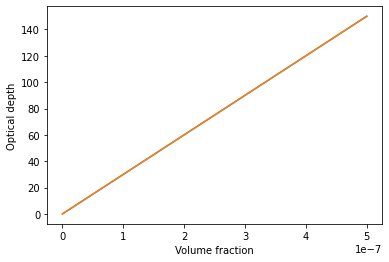

300000000.0000002
0.0
300000000.0000001
-1.4210854715202004e-14


In [6]:
#plot volume fration VS iop function
import matplotlib.pyplot as plt
import math
from scipy import stats

#linear regression
slope_340nm, intercept_340nm, r_340nm, p_340nm, std_err_340nm = stats.linregress(volume_fraction2, optical_depth3_340nm)
slope_380nm, intercept_380nm, r_380nm, p_380nm, std_err_380nm = stats.linregress(volume_fraction2, optical_depth3_380nm)

def myfunc_340nm(x):
  return slope_340nm * x + intercept_340nm

mymodel = list(map(myfunc_340nm, volume_fraction2))

plt.plot(volume_fraction2,optical_depth3_340nm)
plt.plot(volume_fraction2,optical_depth3_380nm)
#plt.plot(volume_fraction2, mymodel)
#plt.ylim(0,0.0000000110000000)
#plt.xlim(0,3.2)
plt.xlabel('Volume fraction')
plt.ylabel('Optical depth')
plt.show()
#import mathplt.show()

print(slope_340nm)
print(intercept_340nm)
print(slope_380nm)
print(intercept_380nm)